In [1]:
from typing import Callable
from helper.linear_algebra import Vector
import random

In [2]:
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

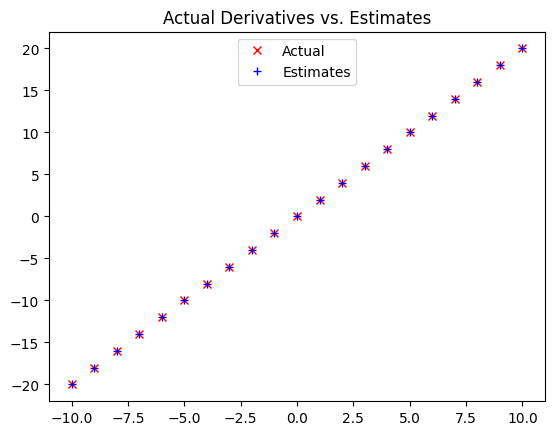

In [3]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

from matplotlib import pyplot as plt

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, "rx", label="Actual") # 'rx' for red x
plt.plot(xs, estimates, "b+", label="Estimates") # 'b+' for blue +
plt.legend(loc=9)
plt.show()

In [4]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                    v: Vector,
                                    i: int,
                                    h: float) -> float:
     """Returns the i-th partial difference quotient of f at v"""
     w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
          for j, v_j in enumerate(v)]

     return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
     return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

### Using Gradient Descent to adjust Models

In [9]:
from helper.linear_algebra import distance, add, scalar_multiply

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

In [10]:
from scratch.linear_algebra import vector_mean
    
# Start with random values for slope and intercept.
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

In [11]:
for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.618512348026314, 0.34220907114050997]
1 [10.91179447293759, 0.36514316534625574]
2 [26.057198229715972, 0.3653246734885009]
3 [15.955214105452935, 0.3806512223712399]
4 [22.693252842885265, 0.3858451340319503]
5 [18.198986198929557, 0.3977666966067717]
6 [21.196673972010593, 0.40517014941248775]
7 [19.197223630818346, 0.4155564830856734]
8 [20.53086739472725, 0.42392259375032043]
9 [19.641335370310674, 0.433605615957547]
10 [20.234662913618738, 0.4423797400959426]
11 [19.838922216356398, 0.4517296435293695]
12 [20.102890611333812, 0.4606651064586672]
13 [19.926832627346805, 0.46984666685708365]
14 [20.04427248422654, 0.4788338061507163]
15 [19.96594908682705, 0.4879204110226414]
16 [20.01819987949738, 0.4969105192874232]
17 [19.983357590894535, 0.5059348981283457]
18 [20.006606421771473, 0.5149063859229835]
19 [19.99110842306435, 0.5238831795729091]
20 [20.00145456499565, 0.5328265216368276]
21 [19.994562631669538, 0.5417623231585497]
22 [19.999168486999576, 0.5506733611439021]
2

### Gradient Descent Minibatch

In [12]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [13]:
# Minibatch gradient descent example
    
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.675371321362892, 8.480030460847232]
1 [19.741326627113917, 8.40793577469978]
2 [19.937023348726914, 8.414669563638645]
3 [19.958029550745522, 8.39460770292148]
4 [19.878071475462324, 8.367212655291924]
5 [20.13936498633677, 8.214821981551525]
6 [20.147973855833893, 8.071843634598192]
7 [20.048898178234467, 8.071883337013334]
8 [19.79379614489267, 8.058962770865563]
9 [20.098365828919132, 7.972072760613327]
10 [21.35863671815105, 7.88731785905324]
11 [20.23480051114458, 7.818601795313979]
12 [20.12883321297473, 7.840580338708533]
13 [19.888256346239615, 7.836034817580007]
14 [19.911563507622105, 7.82080047459929]
15 [20.412424687797056, 7.787191284138471]
16 [20.03375131791446, 7.680751896490233]
17 [20.001134774292705, 7.565039708034475]
18 [19.918312118336623, 7.495114553949103]
19 [21.130441898094972, 7.429196995047134]
20 [19.91990401854058, 7.402534268334363]
21 [19.96603521526674, 7.3880235745434115]
22 [20.091109794876456, 7.339335969377021]
23 [20.098190345759004, 7.237163